In [3]:
import numpy as np
# import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
iris = datasets.load_iris()

In [5]:
iris_X, iris_y = iris.data, iris.target

In [6]:
print(iris_X[:5])
print(iris_y[:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3)

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)
print(np.mean(knn.predict(X_test)==y_test))

[0 2 0 2 2 2 0 0 1 1 0 2 1 1 1 1 0 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 0 1 0 2 0
 1 0 1 1 1 1 1 1]
[0 2 0 2 2 2 0 0 1 1 0 2 1 1 1 1 0 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 0 2 0 2 0
 1 0 1 1 1 1 1 1]
0.9777777777777777


---
## Boston data demo

In [9]:
from sklearn.linear_model import LinearRegression
boston_data = datasets.load_boston()
X, y = boston_data.data, boston_data.target

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print(np.sum((model.predict(X) - y)**2)/len(y))
print(model.predict(X)[:5],'\n', y[:5])

21.894831181729202
[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423] 
 [24.  21.6 34.7 33.4 36.2]


---
## data arg

In [21]:
import matplotlib.pyplot as plt
X_, y_ = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=1)

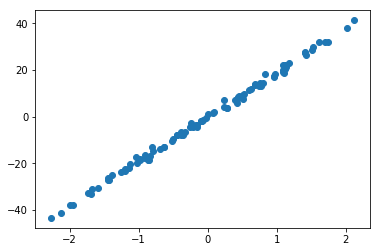

In [23]:
plt.scatter(X_, y_)
plt.show()

---
## Common stats & func

In [27]:
print(len(X[0]))
print(model.coef_)
print(model.intercept_)

13
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855


In [31]:
print(model.get_params())
print(model.score(X, y)) # R^2 coefficient of dermination

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.7406426641094095


---
## Normalization

In [35]:
from sklearn import preprocessing
from sklearn.svm import SVC

In [57]:
X2, y2 = datasets.make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=22, 
                                     n_clusters_per_class=1, scale=100)

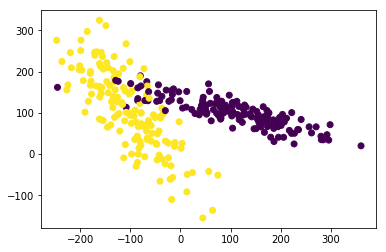

In [58]:
plt.scatter(X2[:,0], X2[:,1], c=y2)
plt.show()

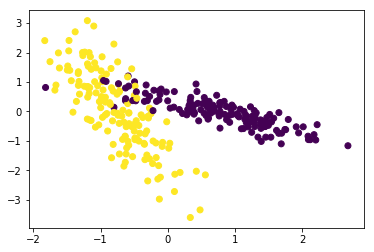

In [60]:
X2 = preprocessing.scale(X2) 
plt.scatter(X2[:,0], X2[:,1], c=y2)
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9444444444444444


---
## Cross Validation

In [68]:
iris = datasets.load_iris()
iris_X, iris_y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(np.mean(knn.predict(X_test)==y_test))
print(y_test)

0.9111111111111111
0.9111111111111111
[2 2 1 1 1 0 1 1 0 1 1 2 2 0 1 2 2 2 0 0 2 0 1 0 0 2 0 2 2 2 1 1 0 0 2 1 0
 1 2 1 2 1 2 1 0]


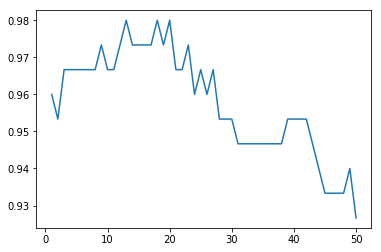

In [104]:
from sklearn.model_selection import cross_val_score
kscores=[]
rang=range(1,51)
for k in rang:
    knn = KNeighborsClassifier(n_neighbors=k)
#     scores = - cross_val_score(knn, iris_X, iris_y, cv=10, scoring='mean_squared_error')
    scores = cross_val_score(knn, iris_X, iris_y, cv=10, scoring='accuracy')
    kscores.append(scores.mean())

# print(kscores)
plt.plot(rang, kscores)
# plt.show()

In [108]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

---
## Overfitting

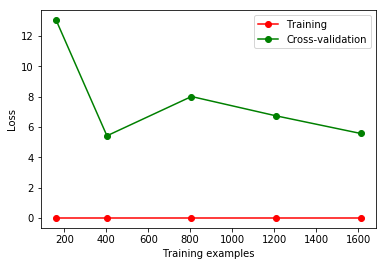

In [109]:
from sklearn.model_selection import  learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
train_sizes, train_loss, test_loss= learning_curve(
        SVC(gamma=0.01), X, y, cv=10, scoring='neg_mean_squared_error',
        train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

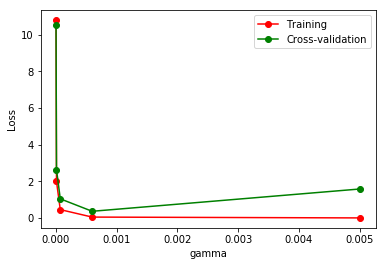

In [110]:
from sklearn.model_selection import  validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(
        SVC(), X, y, param_name='gamma', param_range=param_range, cv=10,
        scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

In [125]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC(gamma='auto')
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

# method 1: pickle
import pickle
# save
with open('./clf.pickle', 'wb') as f:
    pickle.dump(clf, f)
# restore
with open('./clf.pickle', 'rb') as f:
   clf2 = pickle.load(f)
   print(clf2.predict(X))

# # method 2: joblib
# from sklearn.externals import joblib
# # Save
# joblib.dump(clf, '/clf2.pkl')
# # restore
# clf3 = joblib.load('/clf2.pkl')
# print(clf3.predict(X[0:1]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
